In [1]:
import tensorflow as tf
import pickle
from util import *
from load_data import load_input_file, build_combined_input
from NN_train import *
import atlas_mpl_style as ampl
ampl.use_atlas_style()
path_tosave = 'Models/V05_SvsS_Final_6Vars_without_More_Vars'
path_SvsS = path_tosave + '/SvsS/'
path_SvsB = path_tosave + '/SvsB/'

In [4]:
def Load_History_File(path):
    with open(path, 'rb') as f:
        history = pickle.load(f)
    return (history)

In [14]:
print(path_SvsB + "hist_cqu_odd_pos")

Models/V05_SvsS_Final_6Vars_without_More_Vars/SvsB/hist_cqu_odd_pos


In [15]:
SvsS_Even = Load_History_File(path_SvsS + "Even-History")
SvsS_Odd = Load_History_File(path_SvsS + "Odd-History")
SvsB_Even_Cuu_pos = Load_History_File(path_SvsB + "hist_cuu_even_pos")
SvsB_Even_Cuu_neg = Load_History_File(path_SvsB + "hist_cuu_even_neg")
SvsB_Odd_Cuu_pos = Load_History_File(path_SvsB + "hist_cuu_odd_pos")
SvsB_Odd_Cuu_neg = Load_History_File(path_SvsB + "hist_cuu_odd_neg")
SvsB_Even_Cqu_pos = Load_History_File(path_SvsB + "hist_cqu_even_pos")
SvsB_Even_Cqu_neg = Load_History_File(path_SvsB + "hist_cqu_even_neg")
SvsB_Odd_Cqu_pos = Load_History_File(path_SvsB + "hist_cqu_odd_pos")
SvsB_Odd_Cqu_neg = Load_History_File(path_SvsB + "hist_cqu_odd_neg")

In [11]:
def Plot(history, title_string, save_string):
    loss = history['loss']
    val_loss = history['val_loss']
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    best_epoch = np.argmin(val_loss)

    # Create the plot with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()

    ax1.plot(loss, 'b', label='Training loss')
    ax1.plot(val_loss, 'b--', label='Validation loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_xlim(-5,len(loss))
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax1.legend(loc='upper center')

    ax2.plot(acc, 'r', label='Training accuracy')
    ax2.plot(val_acc, 'r--', label='Validation accuracy')
    ax2.vlines(best_epoch, 0.60, 0.84, linestyle='--', label='Best epoch')
    ax2.set_ylabel('Accuracy')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.legend(loc='upper right')
    ax2.set_ylim(0.6 , 0.9 )
    ampl.plot.draw_atlas_label(0.04, 0.96, status='Internal')
    plt.title(title_string)
    
    plt.show()
    plt.savefig(save_string)

In [119]:
def Plot_Odd_Even_Compare(history_odd, history_even, title_string, save_string):
    loss_odd = history_odd['loss']
    val_loss_odd = history_odd['val_loss']
    acc_odd = history_odd['accuracy']
    val_acc_odd = history_odd['val_accuracy']
    
    loss_even = history_even['loss']
    val_loss_even = history_even['val_loss']
    acc_even = history_even['accuracy']
    val_acc_even = history_even['val_accuracy']
    
    
    best_epoch_odd = np.argmin(val_loss_odd)
    best_epoch_even = np.argmin(val_loss_even)
    
    max_epoch = np.min((len(val_acc_odd), len(val_acc_even))) + 1

    # Create the plot with two y-axes
    fig, ax1 = plt.subplots(figsize=(14, 8))
    ax2 = ax1.twinx()

    ax1.plot(loss_odd, 'b', label='Training loss odd')
    ax1.plot(val_loss_odd, 'b--', label='Validation loss odd')
    ax1.plot(loss_even, 'k', label='Training loss even')
    ax1.plot(val_loss_even, 'k--', label='Validation loss even')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_xlim(-5, max_epoch)
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax1.legend(loc='upper center')

    ax2.plot(acc_odd, 'r', label='Training accuracy odd')
    ax2.plot(val_acc_odd, 'r--', label='Validation accuracy odd')
    ax2.plot(acc_even, color='darkorange', label='Training accuracy even')
    ax2.plot(val_acc_even, '--', color='darkorange', label='Validation accuracy even')
    ax2.vlines(best_epoch_odd, 0.6455, 0.654, linestyle='--', label='Best epoch odd', color='purple')
    ax2.vlines(best_epoch_even, 0.6455, 0.654, linestyle='--', label='Best epoch even')
    ax2.set_ylabel('Accuracy')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.legend(loc='upper right')
    ax2.set_ylim(0.645 , 0.66)
    ampl.plot.draw_atlas_label(0.04, 0.96, status='Internal')
    plt.title(title_string)
    
    plt.savefig(save_string)
    plt.show()

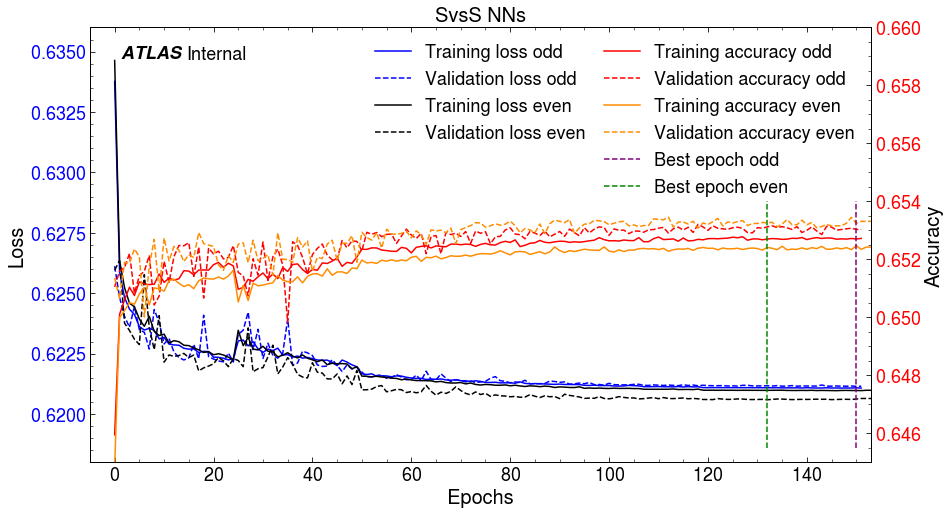

In [120]:
Plot_Odd_Even_Compare(SvsS_Odd, SvsS_Even, "SvsS NNs", path_SvsS+"Loss-Acc_Compare.png")
#Plot(SvsS_Odd, "SvsS Odd", path_SvsS+"Loss-Acc_Odd.png")
#Plot(SvsS_Even, "SvsS Even", path_SvsS+"Loss-Acc_Even.png")

In [117]:
def Plot_Odd_Even_Compare(history_odd, history_even, title_string, save_string):
    loss_odd = history_odd['loss']
    val_loss_odd = history_odd['val_loss']
    acc_odd = history_odd['accuracy']
    val_acc_odd = history_odd['val_accuracy']
    
    loss_even = history_even['loss']
    val_loss_even = history_even['val_loss']
    acc_even = history_even['accuracy']
    val_acc_even = history_even['val_accuracy']
    
    best_epoch_odd = np.argmin(val_loss_odd)
    best_epoch_even = np.argmin(val_loss_even)
    
    max_epoch = np.min((len(val_acc_odd), len(val_acc_even))) + 1

    # Create the plot with two y-axes
    fig, ax1 = plt.subplots(figsize=(14, 8))
    ax2 = ax1.twinx()

    ax1.plot(loss_odd, 'b', label='Training loss odd')
    ax1.plot(val_loss_odd, 'b--', label='Validation loss odd')
    ax1.plot(loss_even, 'k', label='Training loss even')
    ax1.plot(val_loss_even, 'k--', label='Validation loss even')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_xlim(-5, max_epoch)
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax1.legend(loc='upper center')

    ax2.plot(acc_odd, 'r', label='Training accuracy odd')
    ax2.plot(val_acc_odd, 'r--', label='Validation accuracy odd')
    ax2.plot(acc_even, color='orange', label='Training accuracy even')
    ax2.plot(val_acc_even, '--', color='orange', label='Validation accuracy even')
    ax2.vlines(best_epoch_odd, 0.705, 0.88, linestyle='--', label='Best epoch odd', color='purple')
    ax2.vlines(best_epoch_even, 0.705, 0.88, linestyle='--', label='Best epoch even')
    ax2.set_ylabel('Accuracy')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.legend(loc='upper right')
    ax2.set_ylim(0.7 , 1 )
    ampl.plot.draw_atlas_label(0.04, 0.96, status='Internal')
    plt.title(title_string)
    
    plt.savefig(save_string)
    plt.show()


def Plot(history, title_string, save_string):
    loss = history['loss']
    val_loss = history['val_loss']
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    best_epoch = np.argmin(val_loss)

    # Create the plot with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()

    ax1.plot(loss, 'b', label='Training loss')
    ax1.plot(val_loss, 'b--', label='Validation loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_xlim(-5,len(loss))
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax1.legend(loc='upper center')

    ax2.plot(acc, 'r', label='Training accuracy')
    ax2.plot(val_acc, 'r--', label='Validation accuracy')
    ax2.vlines(best_epoch, 0.60, 0.84, linestyle='--', label='Best epoch')
    ax2.set_ylabel('Accuracy')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.legend(loc='upper right')
    ax2.set_ylim(0.6 , 0.9 )
    ampl.plot.draw_atlas_label(0.04, 0.96, status='Internal')
    plt.title(title_string)
    
    plt.savefig(save_string)
    plt.show()

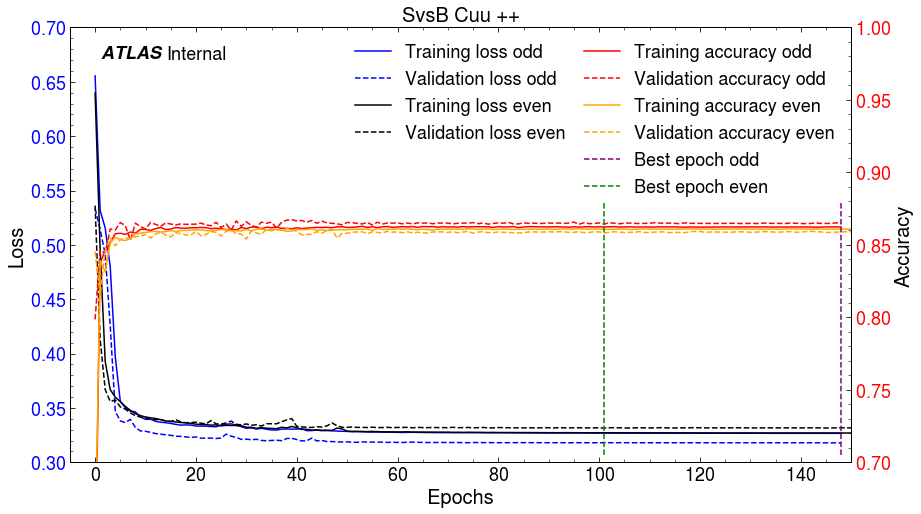

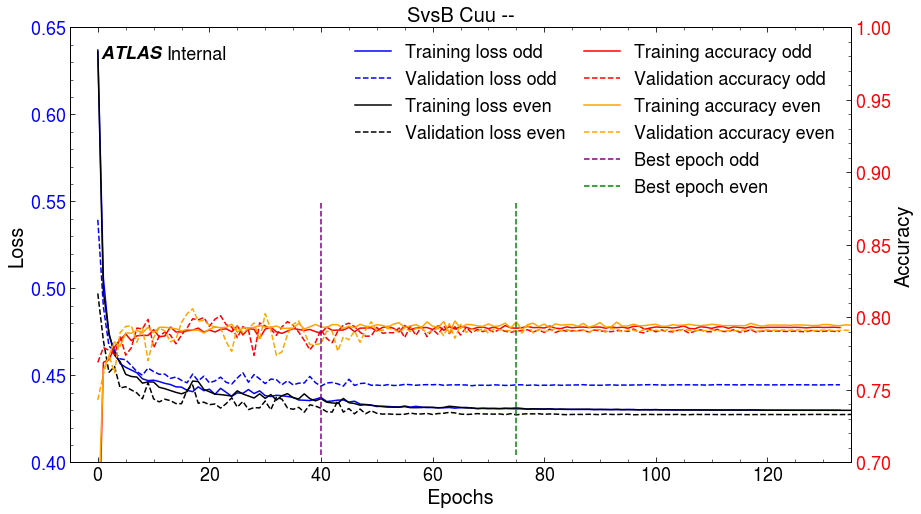

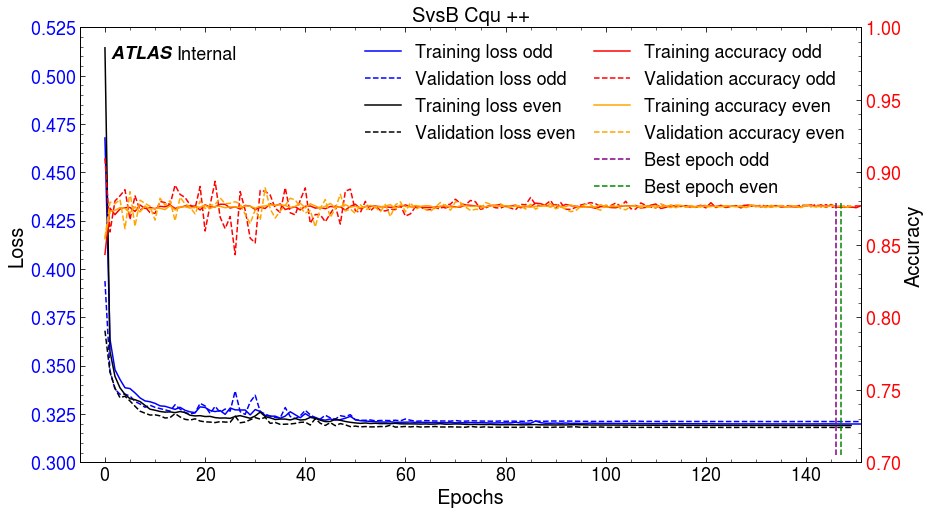

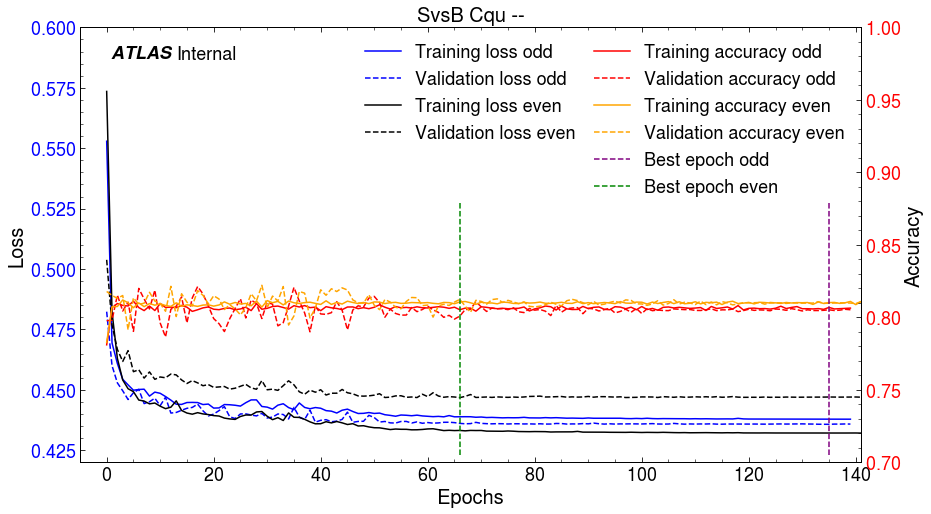

In [118]:
Plot_Odd_Even_Compare(SvsB_Odd_Cuu_pos, SvsB_Even_Cuu_pos, "SvsB Cuu ++", path_SvsB+"Cuu_pos_Loss-Acc_Compare.png")
Plot_Odd_Even_Compare(SvsB_Odd_Cuu_neg, SvsB_Even_Cuu_neg, "SvsB Cuu --", path_SvsB+"Cuu_neg_Loss-Acc_Compare.png")
Plot_Odd_Even_Compare(SvsB_Odd_Cqu_pos, SvsB_Even_Cqu_pos, "SvsB Cqu ++", path_SvsB+"Cqu_pos_Loss-Acc_Compare.png")
Plot_Odd_Even_Compare(SvsB_Odd_Cqu_neg, SvsB_Even_Cqu_neg, "SvsB Cqu --", path_SvsB+"Cqu_neg_Loss-Acc_Compare.png")